<a href="https://colab.research.google.com/github/jasp27/ds4bme_intro_p1/blob/main/Project_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

1A)

We can find the nonzero principal components by finding the eigenvalues of the covariance matrix. The covariance matrix from averaging Σ0 and Σ1 is 
\begin{bmatrix}
1 & 0.5\\
0.5 & 1.5
\end{bmatrix}

The eigenvalues are 0.69 and 1.81 by finding the root of the characteristic polynomials of the covariance matrix. There are therefore 2 nonzero principal components.

In [14]:
# 1B&C)

m0 = np.matrix([[1,1], [1,2]])
m1 = np.matrix([[1,0], [0,1]])
mean = [0,0]
cov = 0.5*(m0 + m1)
print('Covariance matrix:' + str(cov))

eigenvalues, eigenvectors = np.linalg.eig(cov)
print( "Eigenvalues:" + str(eigenvalues))
print("Eigenvectors:" + str(eigenvectors))

Covariance matrix:[[1.  0.5]
 [0.5 1.5]]
Eigenvalues:[0.69098301 1.80901699]
Eigenvectors:[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


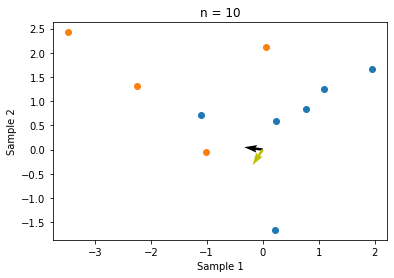

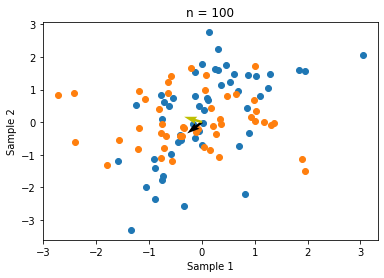

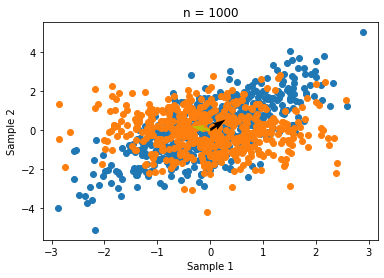

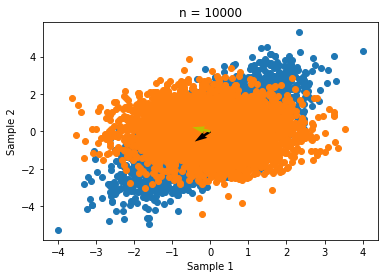

In [15]:
#1D)
for i in [10, 100, 1000, 10000]:
  plt.figure()
  smplsize = sum(np.random.binomial (n=1, p=0.5, size =i)) 
  m0a, m0b = np.transpose(np.random.multivariate_normal(mean, m0, size= smplsize))
  m1a, m1b = np.transpose(np.random.multivariate_normal(mean, m1, size=(i- smplsize)))
  plt.scatter(m0a,m0b)
  plt.scatter(m1a,m1b)
  x = np.concatenate((np.concatenate((m0a,m1a), axis=0).reshape(i,1), np.concatenate((m0b, m1b), axis =0).reshape(i,1)), axis =1)
  pca = PCA().fit(x)
  toteigvectors = pca.components_
  toteigvalues = pca.explained_variance_
  a , b = toteigvectors * toteigvalues
  plt.quiver(*[0],[0], a[0], a[1])
  plt.quiver(*[0],[0], b[0], b[1], color = 'y')
  plt.xlabel('Sample 1')
  plt.ylabel('Sample 2')
  plt.title("n = " +str(i))


Text(0.5, 1.0, 'Difference b/w Eigenvalues and Eigenvectors')

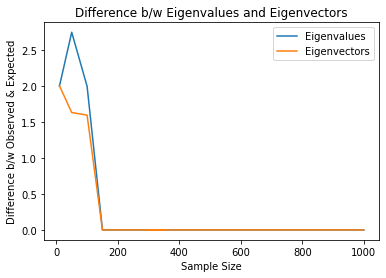

In [24]:
# 1E)
values = np.zeros(14)
vectors = np.zeros(14)
for i in [10, 50, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000]:
  smplsize = sum(np.random.binomial (n=1, p=0.5, size =i)) 
  m0a, m0b = np.transpose(np.random.multivariate_normal(mean, m0, size= smplsize))
  m1a, m1b = np.transpose(np.random.multivariate_normal(mean, m1, size=(i- smplsize)))
  x = np.concatenate((np.concatenate((m0a,m1a), axis=0).reshape(i,1), np.concatenate((m0b, m1b), axis =0).reshape(i,1)), axis =1)
  pca = PCA().fit(x)
  toteigvectors = pca.components_
  toteigvalues = pca.explained_variance_
  values[int(np.log10(i)) - 1] = np.linalg.norm(toteigvalues - eigenvalues)
  vectors[int(np.log10(i)) - 1] = np.linalg.norm(toteigvectors - eigenvectors)
plt.plot([10, 50, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000], vectors)
plt.plot([10, 50, 100, 150, 200, 350, 300, 400, 500, 600, 700, 800, 900, 1000], values)
plt.xlabel("Sample Size")
plt.ylabel("Difference b/w Observed & Expected")
plt.legend(["Eigenvalues", "Eigenvectors"])
plt.title("Difference b/w Eigenvalues and Eigenvectors")

1F) This shows the difference between the expected eigenvalues & the eigenvectors and the observed samples. We can see it go from 0 to n number of samples to see where it goes to infinity. The observed converges to the expected values when sample size is increased. The significance of this convergence is finding the overall covariance of the Guassian distribution and how it is the same answer as mixing multivariate Guassiansan and finding the principal components when the sample size is large enough. This might be an easier method to get the same answer. 

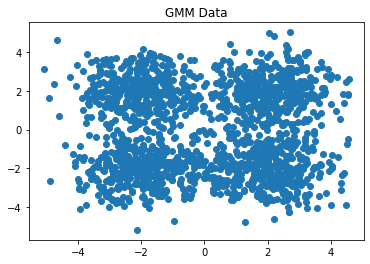

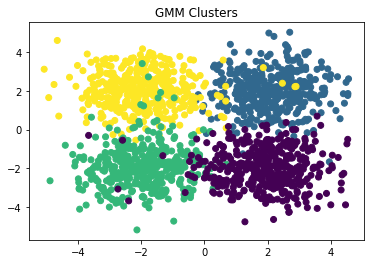

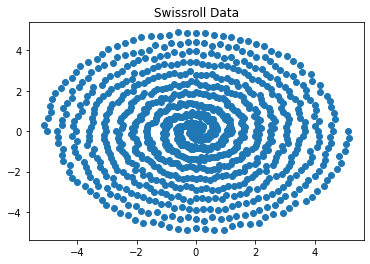

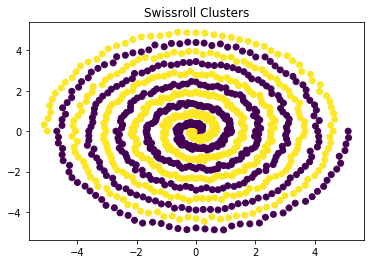

In [25]:
# 2A) 

gmm = pd.read_csv("https://raw.githubusercontent.com/ds4ph-bme/project-8-jasp27/main/gmm.csv?token=GHSAT0AAAAAABYFPNGVCLPDCYIP5HLYIYDKY24TAOQ")
swiss = pd.read_csv("https://raw.githubusercontent.com/ds4ph-bme/project-8-jasp27/main/swissroll.csv?token=GHSAT0AAAAAABYFPNGUDWNEUBGHLHDJVDZGY24TA2Q")

gmm = gmm.drop(gmm.index[0])
plt.figure()
plt.title("GMM Data")
plt.scatter(gmm["X_1"], gmm["X_2"])
gmmkmeans = KMeans(n_clusters= 4)
gmmkmeans.fit(gmm)
ykmeans = gmmkmeans.predict(gmm)
plt.figure()
plt.title("GMM Clusters")
plt.scatter(gmm["X_1"],gmm["X_2"], c=ykmeans)

swiss = swiss.drop(swiss.index[0])
plt.figure()
plt.title("Swissroll Data")
plt.scatter(swiss["X_1"], swiss["X_2"])
swisskmeans = KMeans(n_clusters= 2)
swisskmeans.fit(swiss)
ykmeans = swisskmeans.predict(swiss)
plt.figure()
plt.title("Swissroll Clusters")
plt.scatter(swiss["X_1"],swiss["X_2"], c=ykmeans)



2B)
The GMM data seems like it is 4 clusters since there are 4 distinct blobs which is why I chose k =4 for that. 

The Swissroll data are two spirals spinning together so it makes sense to split it into 2 clusters and therefore k =2.


Text(0.5, 1.0, 'Swissroll')

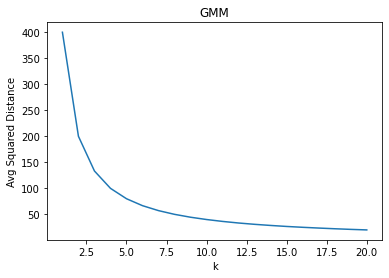

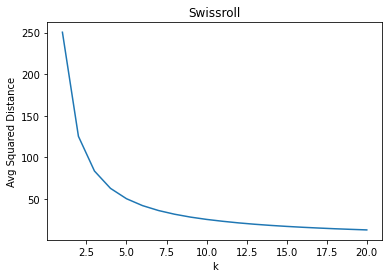

In [28]:
# 2C)

x = []
for i in range(1, 21):
  x.append(i)

gmmlist = []
swisslist = []

for i in x:
  gmmfit = KMeans (n_clusters=i).fit(gmm)
  gmmlist.append(sum(np.min(cdist(gmm, gmmfit.cluster_centers_), axis=1)) / gmm.shape[0])
  swissfit = KMeans(n_clusters = i).fit(swiss)
  swisslist.append(sum(np.min(cdist(swiss, swissfit.cluster_centers_), axis=1)) / swiss.shape[0])

plt.figure()
plt.plot(x, gmmlist)
plt.xlabel("k")
plt.ylabel("Avg Squared Distance")
plt.title("GMM")

plt.figure()
plt.plot(x,swisslist)
plt.xlabel('k')
plt.ylabel('Avg Squared Distance')
plt.title("Swissroll")



The Kmeans performed pretty well on each data set since the GMM split into 4 clusters and the Swissroll split into 2 clusters. But it wasn't perfect since the GMM had some data points that were not separated well in the cluster as we can see soem stray colors. We can improve kmeans by testing different k values so we can use an algorthim to find the most efficient k value.